Now we'll be working with multilinear regression , again we'll be first importing the necessary modules and library and althen importing the csv file via  via pandas (url) provided by the ibm course only

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


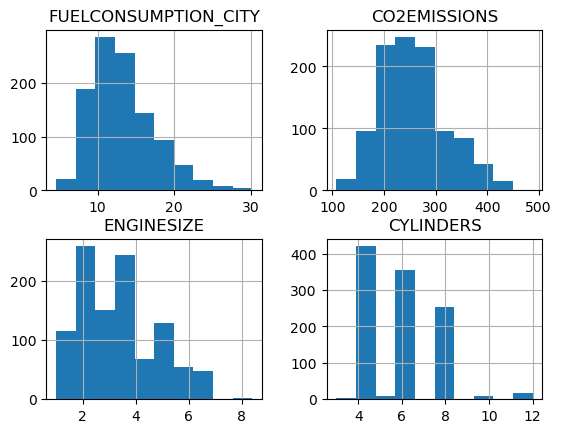

In [8]:
sdf=df[['FUELCONSUMPTION_CITY','CO2EMISSIONS','ENGINESIZE','CYLINDERS']]
viz=sdf[['FUELCONSUMPTION_CITY','CO2EMISSIONS','ENGINESIZE','CYLINDERS']]
viz.hist()
plt.show()

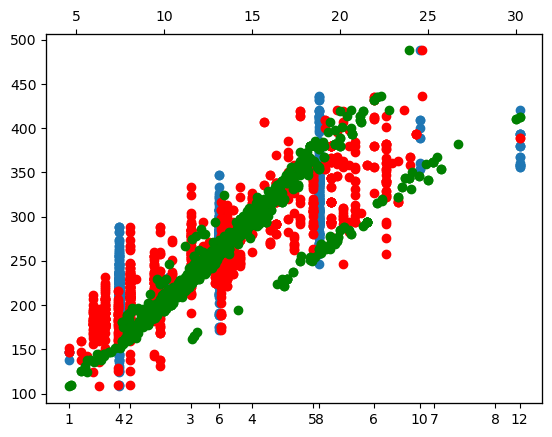

In [13]:
fig, ax = plt.subplots()
ay = ax.twiny()
az = ay.twiny()

ax.scatter(sdf.CYLINDERS, sdf.CO2EMISSIONS)
ay.scatter(sdf.ENGINESIZE, sdf.CO2EMISSIONS, color='r')
az.scatter(sdf.FUELCONSUMPTION_CITY,sdf.CO2EMISSIONS, color='g')
plt.show()

In [14]:
set1 = np.random.rand(len(sdf)) < 0.8
train = sdf[set1]
test = sdf[~set1]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.02376787  6.58022798  8.57434173]]


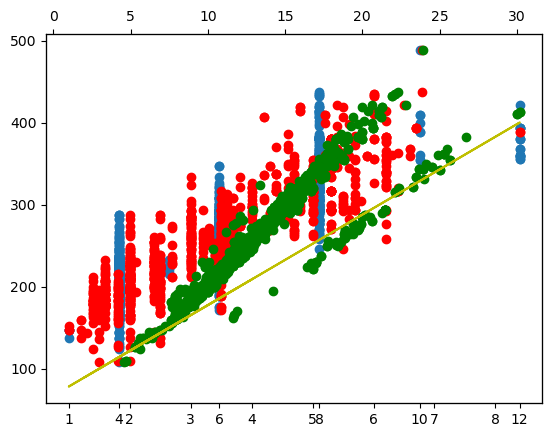

In [24]:
fig, ax = plt.subplots()
ay = ax.twiny()
az = ay.twiny()

ax.scatter(sdf.CYLINDERS, sdf.CO2EMISSIONS)
ay.scatter(sdf.ENGINESIZE, sdf.CO2EMISSIONS, color='r')
az.scatter(sdf.FUELCONSUMPTION_CITY,sdf.CO2EMISSIONS, color='g')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], 'y')


plt.show()

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 17.00
Residual sum of squares (MSE): 545.55
R2-score: 0.85


In [30]:

test_x1 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])
q=int(input("Enter engine size : "))
r=int(input("Enter cylinders : "))
t=int(input("Enter fuel consumption per city : "))
lvl_of_interest =  np.array([q,r,t])
lvl_of_interest1 = np.reshape(lvl_of_interest,(1,-1))
testb=regr.predict(lvl_of_interest1)
print(testb)

Enter engine size :  2
Enter cylinders :  4
Enter fuel consumption per city :  9


[[192.86174219]]
